In [1]:
!pip install seaborn

In [3]:
import seaborn as sns

In [ ]:
## Load data --> load_dataset
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Text(0.5, 1.0, 'Total Bill VS Tip Chart')

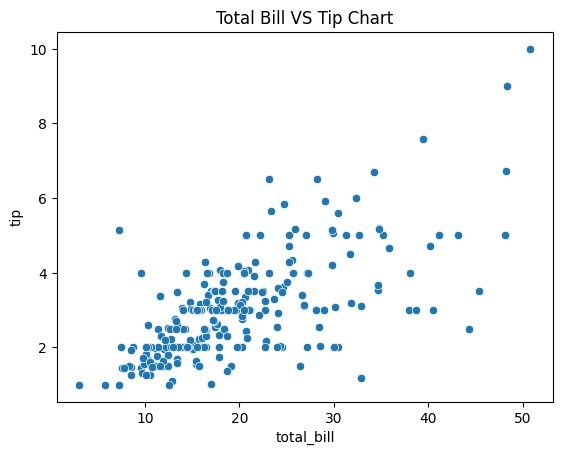

In [11]:
# Scatter Plot
import matplotlib.pyplot as plt
sns.scatterplot(x='total_bill',y='tip',data=tips)
plt.title("Total Bill VS Tip Chart")

Text(0.5, 1.0, 'size vs total bill')

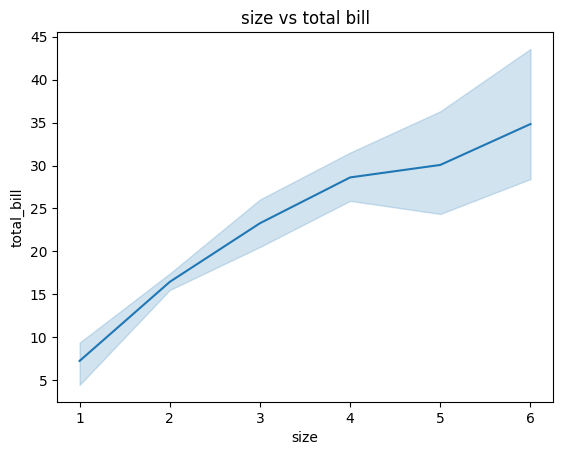

In [13]:
### Line plot 

sns.lineplot(x='size',y='total_bill',data=tips)
plt.title("size vs total bill")

Text(0.5, 1.0, 'Avg.bill on each day')

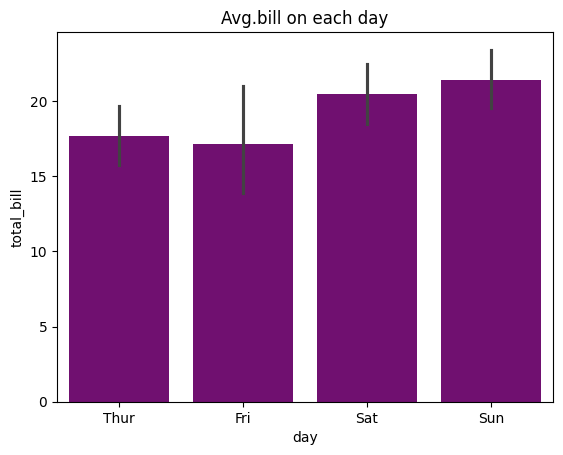

In [15]:
### Categorical plot
# 1. Bar plot

sns.barplot(x='day',y='total_bill',data=tips,color='purple')
plt.title("Avg.bill on each day")

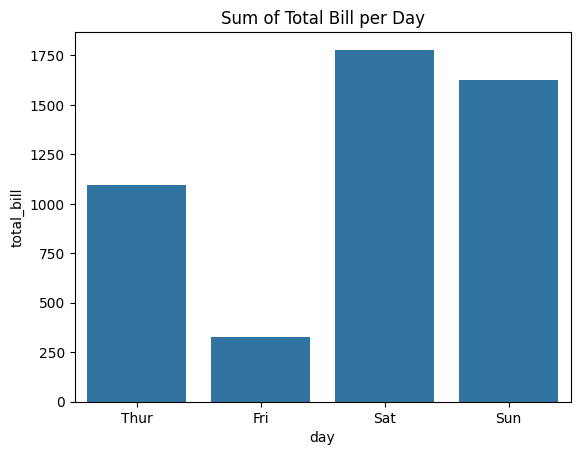

In [20]:
sns.barplot(data=tips, x="day", y="total_bill", estimator=sum, errorbar=None)
plt.title("Sum of Total Bill per Day")
plt.show()


Text(0.5, 1.0, 'Day Vs Total_bill')

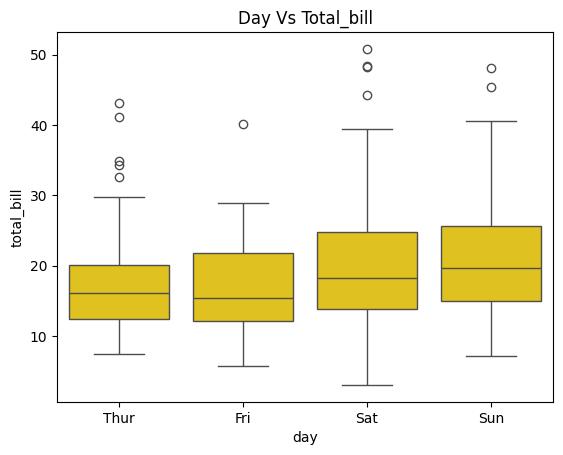

In [18]:
### Box Plot to find a outlier

sns.boxplot(x='day',y='total_bill',data=tips,color='gold')
plt.title("Day Vs Total_bill")

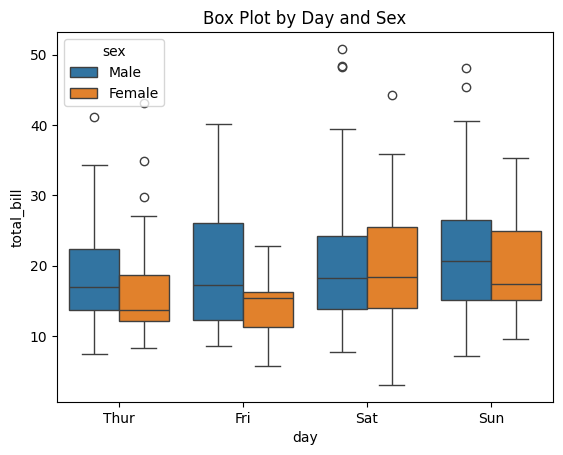

In [21]:
sns.boxplot(data=tips, x="day", y="total_bill", hue="sex")
plt.title("Box Plot by Day and Sex")
plt.show()


<Axes: xlabel='day', ylabel='total_bill'>

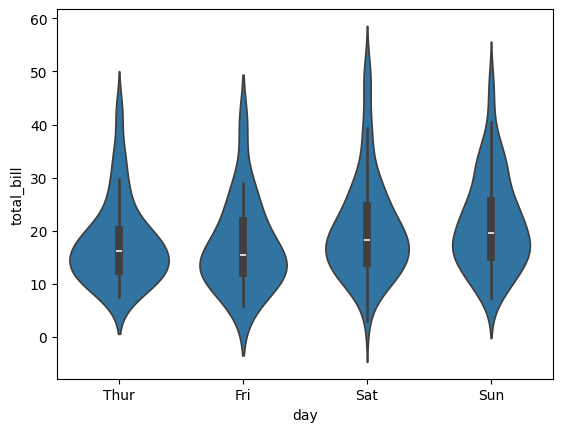

In [22]:
### Violine Plot
sns.violinplot(x='day',y='total_bill',data=tips)

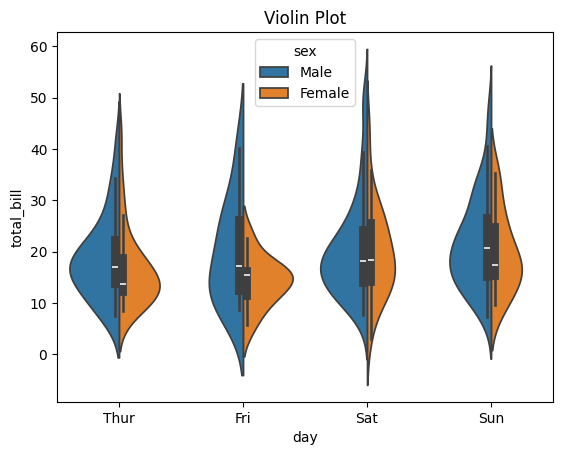

In [23]:
sns.violinplot(data=tips, x="day", y="total_bill", hue="sex", split=True)
plt.title("Violin Plot")
plt.show()


<Axes: xlabel='total_bill', ylabel='Count'>

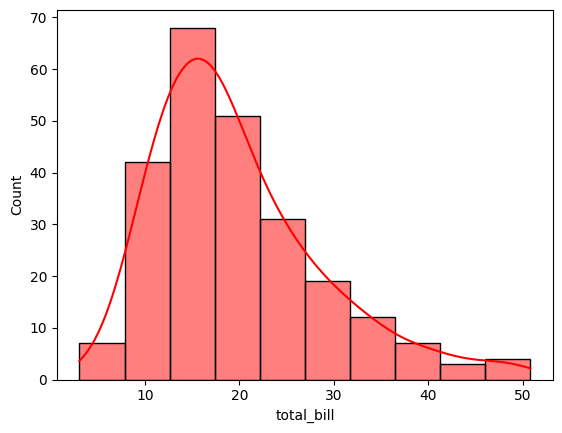

In [26]:
### Histogram plot

sns.histplot(tips['total_bill'],bins=10,kde=True,color='Red')

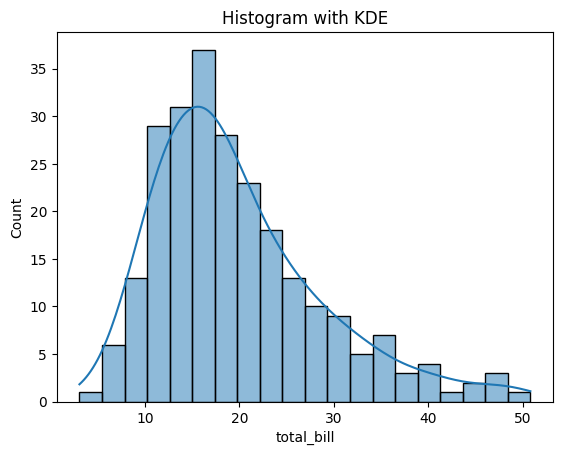

In [27]:
sns.histplot(data=tips, x="total_bill", bins=20, kde=True)
plt.title("Histogram with KDE")
plt.show()


<Axes: xlabel='total_bill', ylabel='Density'>

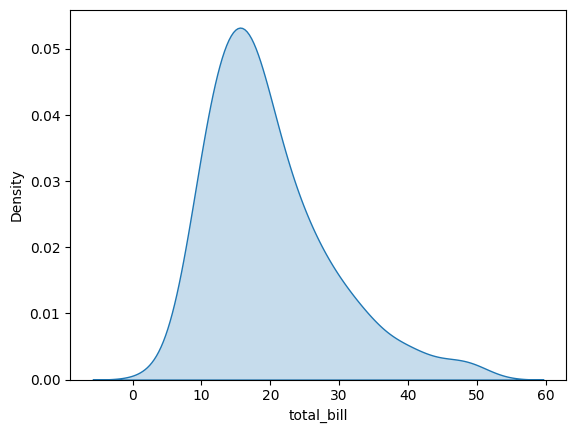

In [30]:
## kde plot

sns.kdeplot(tips['total_bill'],fill=True)

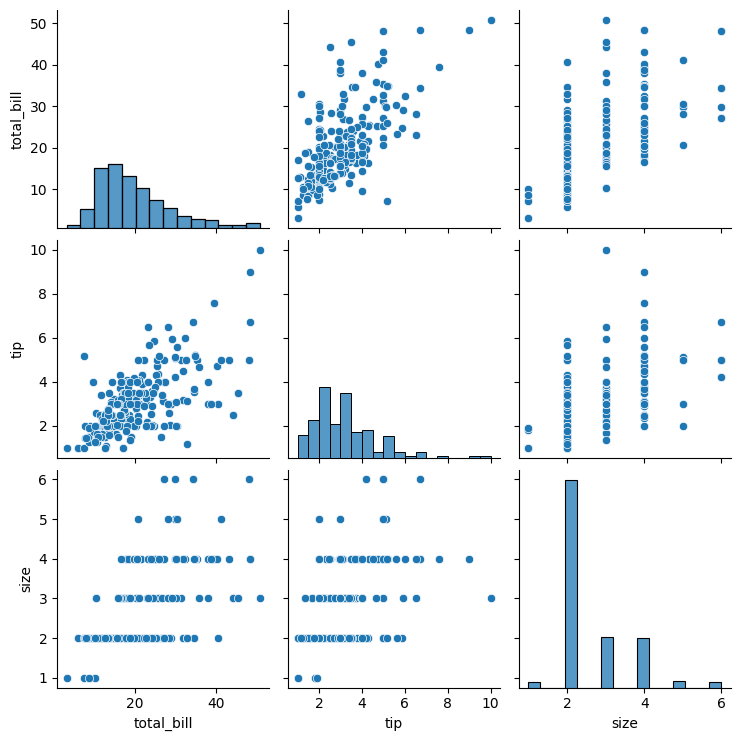

In [31]:
### Pair Plot

sns.pairplot(tips)

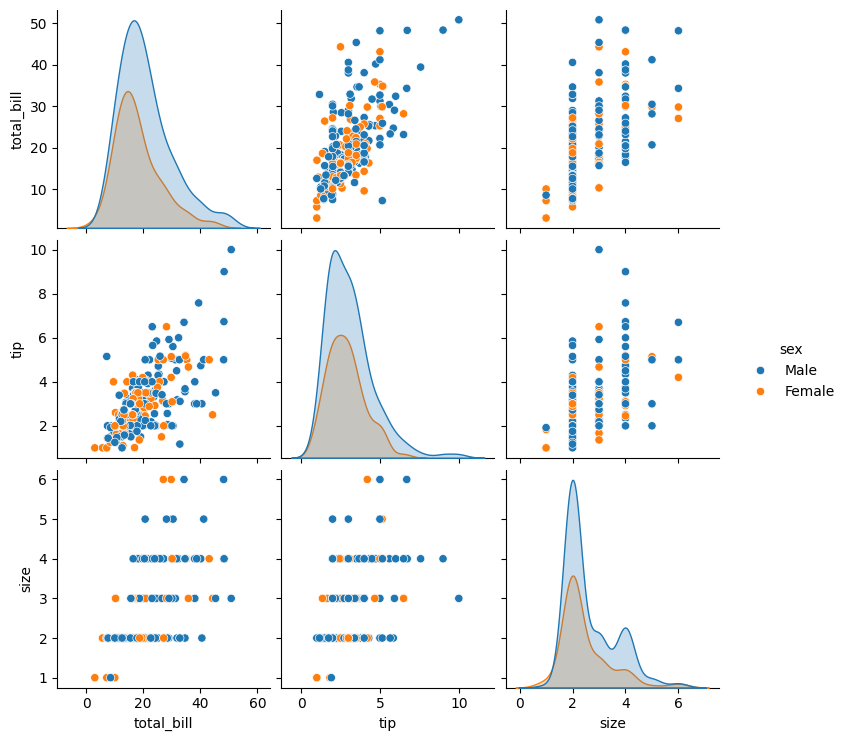

In [32]:
sns.pairplot(tips, hue="sex")
plt.show()


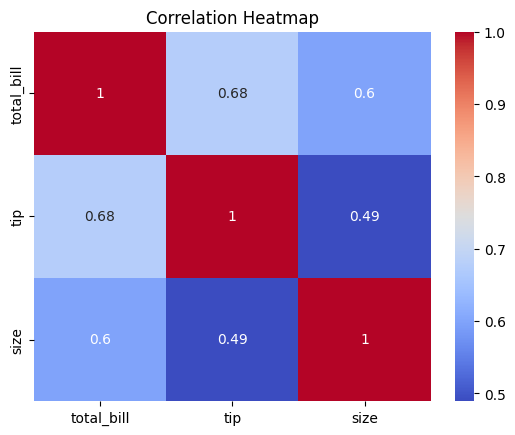

In [33]:
### Heat Map

corr = tips.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
import pandas as pd

sales_data=pd.read_csv('Merged_Sales_Data.csv')

sales_data['Quantity Ordered'] = pd.to_numeric(sales_data['Quantity Ordered'], errors='coerce')
sales_data['Price Each'] = pd.to_numeric(sales_data['Price Each'], errors='coerce')

# Now create Total Price column
sales_data['Total Price'] = sales_data['Quantity Ordered'] * sales_data['Price Each']

sales_data.head(5)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Total Price
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.90
1,176559,Bose SoundSport Headphones,1.0,99.99,04-07-2019 22:30,"682 Chestnut St, Boston, MA 02215",99.99
2,176560,Google Phone,1.0,600.00,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00
3,176560,Wired Headphones,1.0,11.99,04-12-2019 14:38,"669 Spruce St, Los Angeles, CA 90001",11.99
4,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",11.99


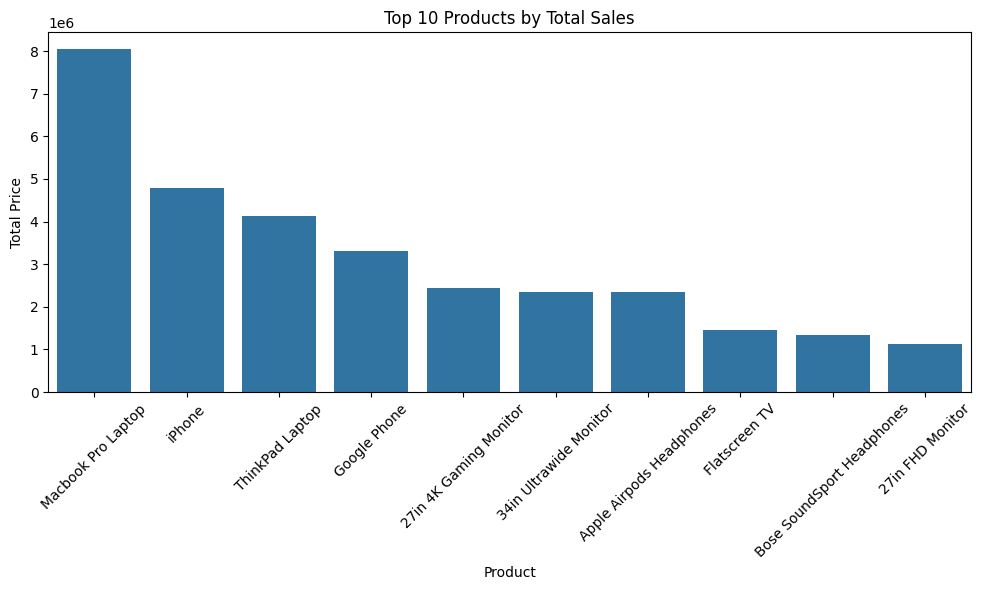

In [41]:
###Plot total Sale by each product

plt.figure(figsize=(10,6))
sns.barplot(x='Product',y='Total Price',estimator=sum, errorbar=None,data=sales_data.groupby('Product',as_index=False)['Total Price'].sum().nlargest(10,'Total Price'))
plt.xticks(rotation=45)
plt.title('Top 10 Products by Total Sales')
plt.tight_layout()
